In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NTV ratio

In [2]:
cols = ["symbol", "market_cap", "USD vol transactions (7dMA)"]
symbols = ["btc", "eth", "bch", "ltc", "ada", "neo", "lsk"]
market_cap = [112512457496, 47028109165, 13274952264, 4930621257, 4154968616, 2435810000, 631262214]
transactions = [3936380000, 738488830, 303702690, 95005840, 9834470000, 39047960, 1562020]
transactions_ma7 = [3322670000, 812520190, 190451990, 77146620, 8672280000, 68779170, 1329840]
data = np.transpose(np.vstack([symbols, market_cap, transactions]))
table = pd.DataFrame(data=data, columns=cols)
for i in range(len(table["symbol"])):
    table["market_cap"][i] = int(table["market_cap"][i])
    table["USD vol transactions (7dMA)"][i] = int(table["USD vol transactions (7dMA)"][i])
table["NVT"] = table["market_cap"] / table["USD vol transactions (7dMA)"]
table

,symbol,market_cap,USD vol transactions (7dMA),NVT
0,btc,112512457496,3936380000,28.5827
1,eth,47028109165,738488830,63.6815
2,bch,13274952264,303702690,43.7104
3,ltc,4930621257,95005840,51.8981
4,ada,4154968616,9834470000,0.42249
5,neo,2435810000,39047960,62.38
6,lsk,631262214,1562020,404.132


# MET ratio

In [3]:
cols = ["symbol", "market_cap", "DAA (7dMA)"]
symbols = ["btc", "eth", "bch", "ltc", "ada", "neo", "lsk"]
market_cap = [112512457496, 47028109165, 13274952264, 4930621257, 4154968616, 2435810000, 631262214]
daa = [638283, 220576, 82308, 110033, 3779, 7135, 4639]
daa_ma7 = [576709, 308898, 46036, 100730, 3342, 5869, 1540]
data = np.transpose(np.vstack([symbols, market_cap, daa_ma7]))
table = pd.DataFrame(data=data, columns=cols)
for i in range(len(table["symbol"])):
    table["market_cap"][i] = int(table["market_cap"][i])
    table["DAA (7dMA)"][i] = int(table["DAA (7dMA)"][i])
table["MET"] = table["market_cap"] / table["DAA (7dMA)"]**2
table

,symbol,market_cap,DAA (7dMA),MET
0,btc,112512457496,576709,0.338288
1,eth,47028109165,308898,0.492864
2,bch,13274952264,46036,6.2638
3,ltc,4930621257,100730,0.485941
4,ada,4154968616,3342,372.01
5,neo,2435810000,5869,70.7156
6,lsk,631262214,1540,266.176


# BTC Cost of Production model

In [4]:
countries = ["Georgia", "China", "EEUU"]
electricity_cost = np.array([0.05, 0.08, 0.12]) # USD/KWh
hash_rate = 12930*10**9 # H/s (Antminer S9)
power_use = 1.375 # KW
difficulty = 5*10**12

time_to_find_a_block = difficulty*2**32/(hash_rate) # take a look at https://en.bitcoin.it/wiki/Difficulty
reward_per_block = 12.5
BTC_mined_per_sec = reward_per_block / time_to_find_a_block

secs_per_hour = 3600
electricity_cost_per_sec = power_use/secs_per_hour*electricity_cost
cost_to_produce_1_btc = electricity_cost_per_sec / BTC_mined_per_sec

print("Country", "BTC Cost [USD]")
for country, cost in zip(countries, cost_to_produce_1_btc):
    print("%s\t%.2f"%(country, cost))

Country BTC Cost [USD]
Georgia	2537.42
China	4059.86
EEUU	6089.80


# XLM valuation using INET model 

In [121]:
tam_2017 = (321.75+609.57/1.2**7)*1000+5000
cagr_2024 = 0.2

market_saturation = [0.2, 0.1, 0.01]
year_fast_growth = [2021, 2021, 2022]
take_over_time = [5, 6, 7] # years

xlm_supply_2018 = 104065.507794 # millions

inflation = 0.01

staking_pct = 0.5

velocity = 14

scenario = 0
initial_year = 2018
simulation_years = 15
years = [initial_year+i for i in range(simulation_years)]

TAM = [tam_2017*(1+cagr_2024)]
for i in range(1,simulation_years):
    if years[i]<=2024:
        TAM.append(TAM[-1]*(1+cagr_2024))
    else:
        TAM.append(TAM[-1]*(1+cagr_2024/(2**(years[i]-2024))))
                 
adoption = [market_saturation[scenario]/(1+np.power(500, (year_fast_growth[scenario]+take_over_time[scenario]/2-years[i])/take_over_time[scenario])) for i in range(simulation_years)]
PQ = np.multiply(adoption, TAM)

xlm_supply = [xlm_supply_2018*((1+inflation)**i)*staking_pct for i in range(simulation_years)]
network_moneteary_base = np.divide(PQ, velocity)
xlm_utility_price = np.divide(network_moneteary_base, xlm_supply)

In [122]:
data = np.transpose(np.vstack([years, TAM, adoption, PQ, xlm_supply, network_moneteary_base, xlm_utility_price]))
cols = ["Year", 
        "TAM [millions USD]",
        "Market adoption [%]", 
        "Transaction Value [millions USD]",
        "XLM supply", 
        "Network Monetary Base [millions USD]", 
        "XLM Utility Price [USD]"]
valuation = pd.DataFrame(data=data, columns=cols)
valuation.set_index("Year", inplace=True)
valuation.index = valuation.index.astype(int)
valuation

,TAM [millions USD],Market adoption [%],Transaction Value [millions USD],XLM supply,Network Monetary Base [millions USD],XLM Utility Price [USD]
Year,,,,,,
2018,5.962438e+05,0.000107,63.986819,52032.753897,4.570487,0.000088
2019,7.154925e+05,0.000371,265.410492,52553.081436,18.957892,0.000361
2020,8.585910e+05,0.001274,1093.802955,53078.612250,78.128783,0.001472
2021,1.030309e+06,0.004281,4410.441933,53609.398373,315.031567,0.005876
2022,1.236371e+06,0.013419,16591.241753,54145.492357,1185.088697,0.021887
2023,1.483645e+06,0.034945,51845.878095,54686.947280,3703.277007,0.067718
2024,1.780374e+06,0.065055,115822.378926,55233.816753,8273.027066,0.149782
2025,1.958412e+06,0.086581,169560.648967,55786.154920,12111.474926,0.217105
2026,2.056332e+06,0.095719,196830.698271,56344.016470,14059.335591,0.249527


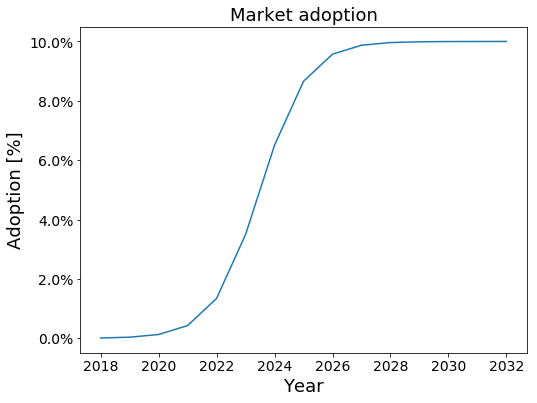

In [141]:
import matplotlib
from matplotlib.ticker import FuncFormatter
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    y = round(y,3)
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)


plt.figure(figsize=[8,6])
plt.title("Market adoption", size=18)
plt.plot(valuation["Market adoption [%]"])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Adoption [%]", fontsize=18)
# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

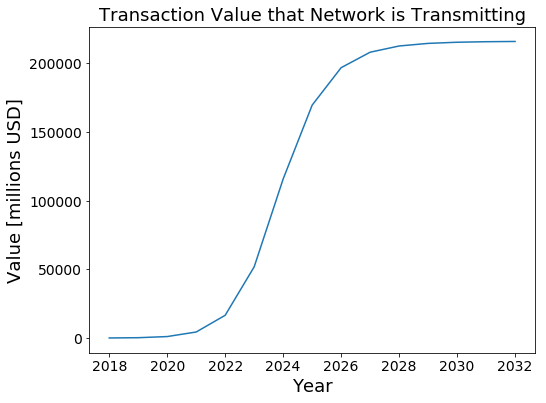

In [142]:
plt.figure(figsize=[8,6])
plt.title("Transaction Value that Network is Transmitting", size=18)
plt.plot(valuation["Transaction Value [millions USD]"])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Value [millions USD]", fontsize=18)
plt.show()

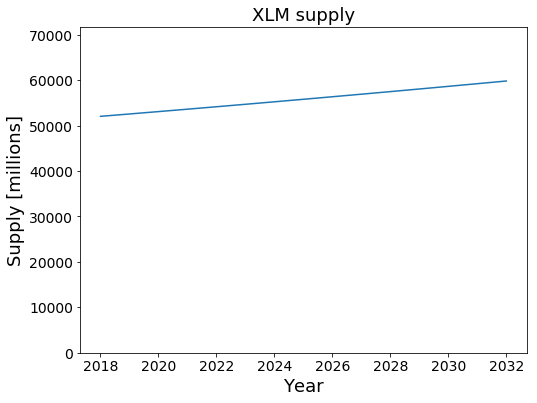

In [143]:
plt.figure(figsize=[8,6])
plt.title("XLM supply", size=18)
plt.plot(valuation["XLM supply"])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Year", fontsize=18)
plt.ylim([0,np.max(valuation["XLM supply"])*1.2])
plt.ylabel("Supply [millions]", fontsize=18)
plt.show()

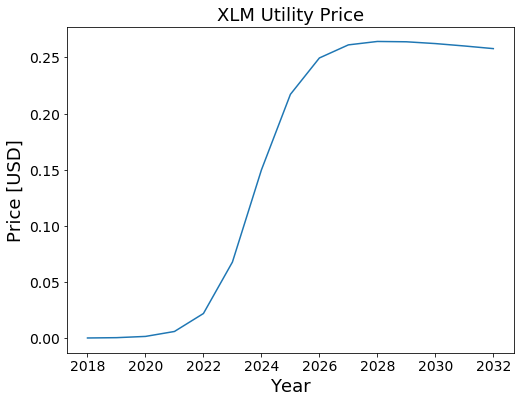

In [144]:
plt.figure(figsize=[8,6])
plt.title("XLM Utility Price", size=18)
plt.plot(valuation["XLM Utility Price [USD]"])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Price [USD]", fontsize=18)
plt.show()

# Discount Cash Flow model

## PinkDate (PDP)

## Augur (REP)